## Diabetes SVM

MATH 371 Final Project

Sarah Welsh, Taylor Webb, Jazmine Sharp, Mary Meloni

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import log_loss
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler


### Data Setup

In [2]:
data = pd.read_csv('diabetes_binary_5050.csv')

# 80% train, 20% test
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Save to new CSV files
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)


In [3]:
#Inputing data
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

#training data
X = data [['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
           'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 
           'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']].to_numpy()
y = data['Diabetes_binary'].to_numpy()

#testing data
X_test = data_test [['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                     'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 
                     'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']].to_numpy()
y_test = data_test['Diabetes_binary'].to_numpy()

### Preprocessing data

considering and testing the BMI data (did not end up modifying this)

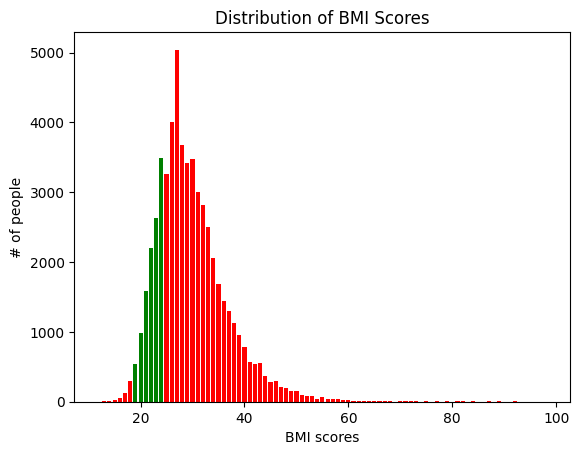

In [4]:
#BMI graphing

bmi_x = data['BMI'].to_numpy()
unique, count = np.unique(bmi_x, return_counts=True)

col = ['green' if 19 <= val <= 24 else 'red' for val in unique]

plt.bar(unique, count, color=col)  # green in the "healthy" BMI range, red outside the range
plt.xlabel('BMI scores')
plt.ylabel('# of people')
plt.title('Distribution of BMI Scores')
plt.show()

standardizing the train and test data

In [25]:
#Standardizing the data

X_Std = X.copy()
X_test_Std = X_test.copy()

scaler = StandardScaler()
X_Std = scaler.fit_transform(X)
X_test_Std = scaler.transform(X_test)


### Model Analysis

Using diagnostic curves to analyze the models default settings

We used the same code to generate the other graph for the default poly kernel (shown in the report)

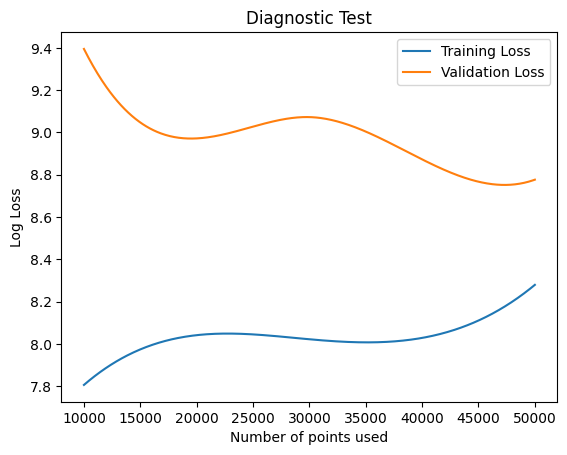

In [6]:
#Diagnostic curves 

x = np.array([10000, 20000, 30000, 40000, 50000])
y_1 = []
y_2 = []

for size in x:
    sample_indices = np.random.choice(len(data), size=size, replace=False)
    X_sampled = X_Std[sample_indices]
    label_sampled = y[sample_indices]
    
    # Split into train and validation sets
    X_train, X_val, label_train, label_val = train_test_split(
        X_sampled, label_sampled, test_size=0.2, random_state=42
    )
    
    # Instantiate and train model inside the loop
    model = SVC(kernel='rbf')
    #model = SVC(kernel='poly')
    model.fit(X_train, label_train)
    
    # Predict probabilities for log loss
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Compute log loss
    eps = 1e-15
    y_pred_train = np.clip(y_pred_train, eps, 1 - eps) #to avoid any log(0) errors
    y_pred_val = np.clip(y_pred_val, eps, 1 - eps)

    y_1.append(-np.mean(label_train * np.log(y_pred_train) + (1 - label_train) * np.log(1 - y_pred_train)))
    y_2.append(-np.mean(label_val * np.log(y_pred_val) + (1 - label_val) * np.log(1 - y_pred_val)))

y_1 = np.array(y_1)
y_2 = np.array(y_2)

# To make the graph curved
cubic_model_1 = interp1d(x, y_1, kind="cubic")
cubic_model_2 = interp1d(x, y_2, kind="cubic")

# Plotting the Graph
X_ = np.linspace(x.min(), x.max(), 500)
Y1_ = cubic_model_1(X_)
Y2_ = cubic_model_2(X_)

plt.plot(X_, Y1_, label="Training Loss")
plt.plot(X_, Y2_, label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Number of points used")
plt.ylabel("Log Loss")
plt.title("Diagnostic Test")
plt.show()

In [7]:
y_pred = model.predict(X_train)
train_accuracy = np.mean(y_pred == label_train) * 100
print("Accuracy (training data): ", train_accuracy, "%")

Accuracy (training data):  76.03 %


^ this was to just sanity test the final model matching the default standardized model we generated below

### Default RBF Model

In [27]:
#creating instance of class & training model
model = SVC(kernel='rbf', tol=0.001)
model.fit(X, y, sample_weight=None)

#testing model (on training data)
y_pred = model.predict(X)
train_accuracy = np.mean(y_pred == y) * 100
print("Accuracy (training data): ", train_accuracy, "%")

#testing model (on test data)
y_pred2 = model.predict(X_test)
test_accuracy = np.mean(y_pred2 == y_test) * 100
print("Accuracy (test data):", test_accuracy, "%")

Accuracy (training data):  74.81123901472955 %
Accuracy (test data): 74.82848857769291 %


In [28]:
#Testing with standardized data!

#creating instance of class & training model
model = SVC(kernel='rbf', tol=0.001) 
model.fit(X_Std, y, sample_weight=None)

#testing model (on training data)
y_pred = model.predict(X_Std)
train_accuracy = np.mean(y_pred == y) * 100
print("Accuracy (training data): ", train_accuracy, "%")

#testing model (on test data)
y_pred2 = model.predict(X_test_Std)
test_accuracy = np.mean(y_pred2 == y_test) * 100
print("Accuracy (test data):", test_accuracy, "%")

Accuracy (training data):  76.02956518663908 %
Accuracy (test data): 74.56680104675011 %


### Default Polynomial Model

In [10]:
#creating instance of class & training model
model = SVC(kernel='poly')
model.fit(X, y, sample_weight=None)

#testing model (on training data)
y_pred = model.predict(X)
train_accuracy = np.mean(y_pred == y) * 100
print("Accuracy (training data): ", train_accuracy, "%")

#testing model (on test data)
y_pred2 = model.predict(X_test)
test_accuracy = np.mean(y_pred2 == y_test) * 100
print("Accuracy (test data):", test_accuracy, "%")

Accuracy (training data):  74.68215656110198 %
Accuracy (test data): 74.52436523092156 %


In [29]:
#Testing with standardized data!

#creating instance of class & training model
model = SVC(kernel='poly')
model.fit(X_Std, y, sample_weight=None)

#testing model (on training data)
y_pred = model.predict(X_Std)
train_accuracy = np.mean(y_pred == y) * 100
print("Accuracy (training data): ", train_accuracy, "%")

#testing model (on test data)
y_pred2 = model.predict(X_test_Std)
test_accuracy = np.mean(y_pred2 == y_test) * 100
print("Accuracy (test data):", test_accuracy, "%")

Accuracy (training data):  74.94562622672537 %
Accuracy (test data): 73.85953744960747 %


### Grid Search

running grid search on higher C values, and lower gamma values

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 5, 10, 100],
    'gamma': [.01, .001, 'scale'],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=2)
grid.fit(X_Std, y)

print("Best Params:", grid.best_params_)

y_pred = grid.predict(X_Std)
train_accuracy = np.mean(y_pred == y) * 100
print("Accuracy (training data): ", train_accuracy, "%")

Best Params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy (training data):  75.20732763955935 %


### Final Model

final test of the full model (including another diagnostic curve)

(and below is testing the final model on the full diabetes binary dataset)

In [31]:

#creating instance of class & training model
model = SVC(kernel='rbf', C=100, gamma=0.001, tol=0.001) 
model.fit(X_Std, y, sample_weight=None)

#testing model (on training data)
y_pred = model.predict(X_Std)
train_accuracy = np.mean(y_pred == y) * 100
print("Accuracy (training data): ", train_accuracy, "%")

#testing model (on test data)
y_pred2 = model.predict(X_test_Std)
test_accuracy = np.mean(y_pred2 == y_test) * 100
print("Accuracy (test data):", test_accuracy, "%")

Accuracy (training data):  75.20732763955935 %
Accuracy (test data): 74.94165075323573 %


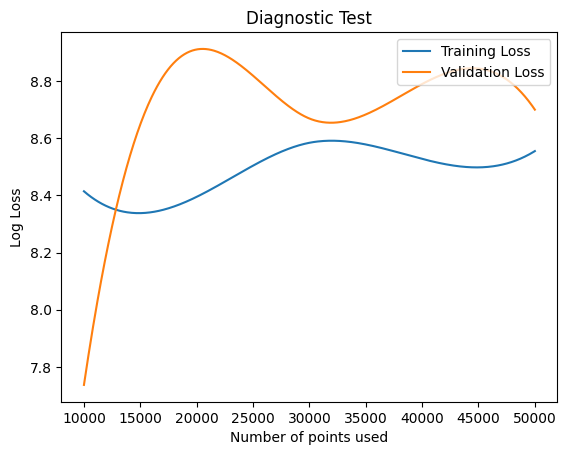

In [34]:
#Final Diagnostic curves 

x = np.array([10000, 20000, 30000, 40000, 50000])
y_1 = []
y_2 = []

for size in x:
    sample_indices = np.random.choice(len(data), size=size, replace=False)
    X_sampled = X_Std[sample_indices]
    label_sampled = y[sample_indices]
    
    # Split into train and validation sets
    X_train, X_val, label_train, label_val = train_test_split(
        X_sampled, label_sampled, test_size=0.2, random_state=42
    )
    
    # Instantiate and train model inside the loop
    model = SVC(kernel='rbf', C=100, gamma=0.001, tol=0.001) 
    model.fit(X_train, label_train)
    
    # Predict probabilities for log loss
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Compute log loss
    eps = 1e-15
    y_pred_train = np.clip(y_pred_train, eps, 1 - eps) #to avoid any log(0) errors
    y_pred_val = np.clip(y_pred_val, eps, 1 - eps)

    y_1.append(-np.mean(label_train * np.log(y_pred_train) + (1 - label_train) * np.log(1 - y_pred_train)))
    y_2.append(-np.mean(label_val * np.log(y_pred_val) + (1 - label_val) * np.log(1 - y_pred_val)))

y_1 = np.array(y_1)
y_2 = np.array(y_2)

# To make the graph curved
cubic_model_1 = interp1d(x, y_1, kind="cubic")
cubic_model_2 = interp1d(x, y_2, kind="cubic")

# Plotting the Graph
X_ = np.linspace(x.min(), x.max(), 500)
Y1_ = cubic_model_1(X_)
Y2_ = cubic_model_2(X_)

plt.plot(X_, Y1_, label="Training Loss")
plt.plot(X_, Y2_, label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Number of points used")
plt.ylabel("Log Loss")
plt.title("Diagnostic Test")
plt.show()

In [32]:
full_data = pd.read_csv('diabetes_binary.csv')

full_X = data [['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
           'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 
           'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']].to_numpy()
full_y = data['Diabetes_binary'].to_numpy()

full_X = scaler.transform(full_X)

y_pred = model.predict(full_X)
train_accuracy = np.mean(y_pred == full_y) * 100
print("Accuracy (training data): ", train_accuracy, "%")

Accuracy (training data):  75.20732763955935 %
